📂 Please upload the 'iris_data.csv' file:


Saving iris_data.csv to iris_data.csv

🔍 Preview of Dataset:
   SepalLength  SepalWidth  PetalLength  PetalWidth     Species
0     7.303275    2.475025     2.176049    0.695003      Setosa
1     7.556928    2.987381     1.921585    1.172615  Versicolor
2     5.254016    2.093516     3.672564    0.550424   Virginica
3     6.409620    2.211042     1.812869    1.745372  Versicolor
4     7.684009    4.056479     4.244270    0.772148      Setosa

❓ Checking for Missing Values:
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  20 non-null     float64
 1   SepalWidth   20 non-null     float64
 2   PetalLength  20 non-null     float64
 3   PetalWidth   20 non-null     float64
 4   Species      20 non-null     object 
dtype

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


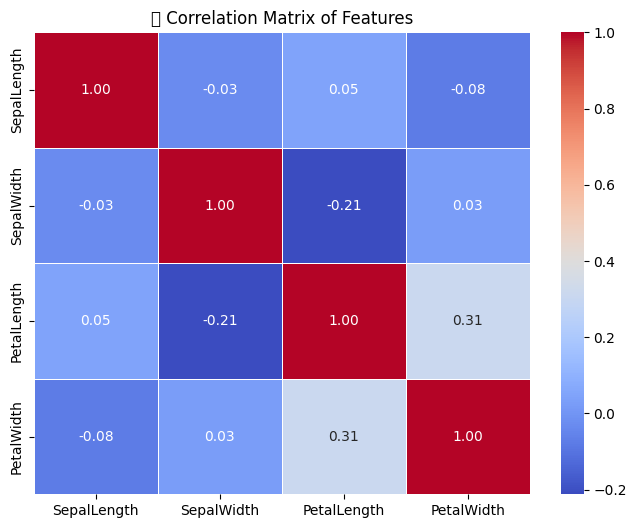

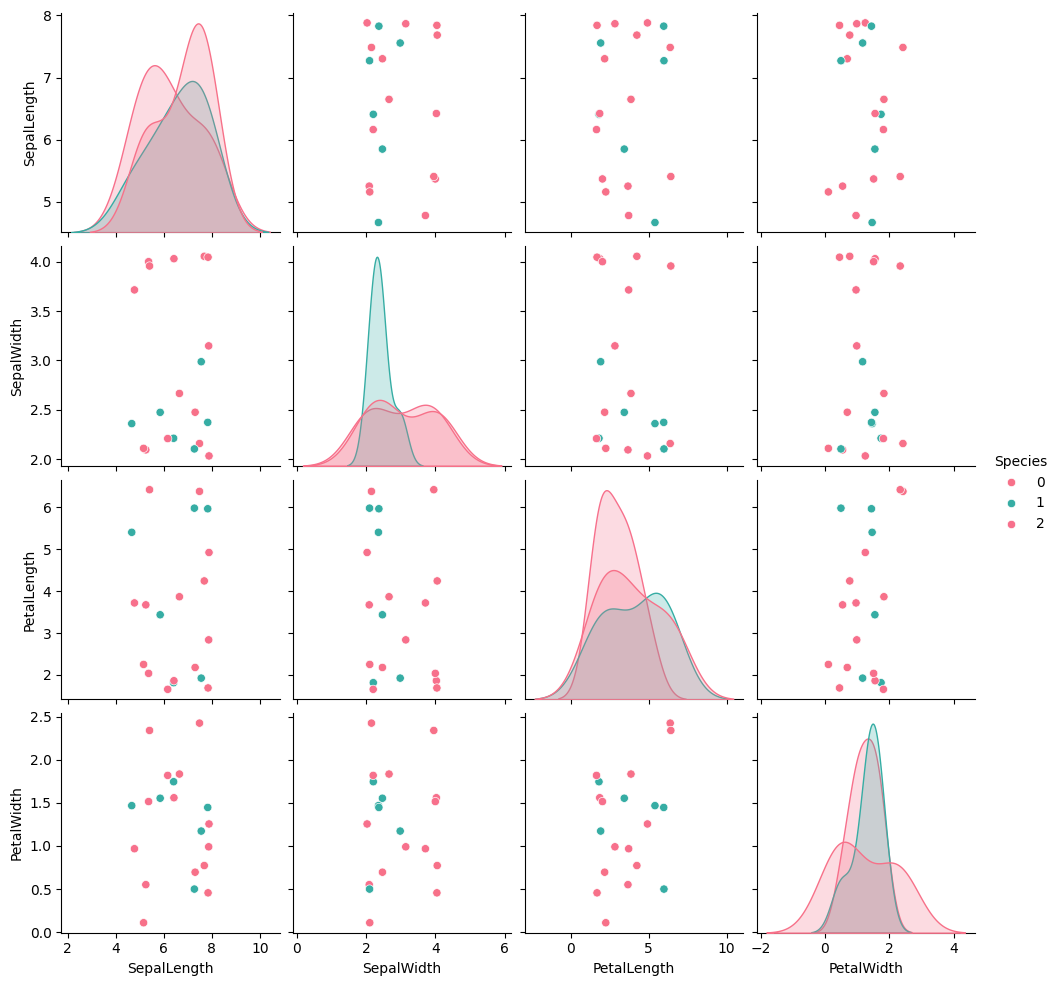


🧩 Training Set Shape: (16, 4)
🧪 Testing Set Shape: (4, 4)

✅ Model Accuracy: 0.25

📜 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.08      0.33      0.13         4
weighted avg       0.06      0.25      0.10         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📂 Report saved and ready to download: classification_report.txt


In [7]:
# ================================
# 📌 Step 1: Import Required Libraries
# ================================
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files

# ================================
# 📌 Step 2: Upload & Load CSV File
# ================================
print("📂 Please upload the 'iris_data.csv' file:")
uploaded = files.upload()  # Manually upload the CSV file

# Define filename (Make sure it matches the uploaded file)
filename = "iris_data.csv"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(filename)

# Display the first 5 rows of the dataset
print("\n🔍 Preview of Dataset:")
print(df.head())

# ================================
# 📌 Step 3: Data Preprocessing & Cleaning
# ================================

# ✅ Check for Missing Values
print("\n❓ Checking for Missing Values:")
print(df.isnull().sum())  # Displays the count of missing values in each column

# ✅ Display Dataset Information (Column Names, Data Types, Missing Data)
print("\n📊 Dataset Information:")
print(df.info())

# ✅ Checking Unique Values in Target Column
print("\n🎯 Unique Classes in Target Column:")
print(df.iloc[:, -1].unique())

# ✅ Extract Features (X) & Target Column (y)
X = df.iloc[:, :-1]  # Select all columns except the last one (Features)
y = df.iloc[:, -1]   # Select the last column (Target variable - Species)

# ✅ Convert Target Labels to Numerical Values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # Convert species names into numbers (Setosa → 0, Versicolor → 1, Virginica → 2)
print("\n🆔 Label Encoding Applied to Target Column")

# ================================
# 📌 Step 4: Correlation Matrix (Fixed)
# ================================

# ✅ Compute Correlation Matrix (Only for Numeric Features)
corr_matrix = df.iloc[:, :-1].corr()  # Exclude non-numeric columns

# ✅ Plot Correlation Heatmap
plt.figure(figsize=(8,6))  # Set figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("📊 Correlation Matrix of Features")
plt.show()

# ✅ Interpretation:
# - Correlation values range from -1 to 1.
# - Values close to +1 indicate strong positive correlation.
# - Values close to -1 indicate strong negative correlation.
# - Values near 0 indicate no significant correlation.

# ================================
# 📌 Step 5: Data Visualization
# ================================

# ✅ Pairplot - Relationship Between Features Colored by Species
df_encoded = df.copy()
df_encoded["Species"] = y  # Replace categorical values with encoded values
sns.pairplot(df_encoded, hue="Species", palette="husl")
plt.show()

# ================================
# 📌 Step 6: Train-Test Split
# ================================

# ✅ Split dataset into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Print Dataset Shapes
print(f"\n🧩 Training Set Shape: {X_train.shape}")
print(f"🧪 Testing Set Shape: {X_test.shape}")

# ================================
# 📌 Step 7: Model Training
# ================================

# ✅ Initialize and train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ================================
# 📌 Step 8: Model Evaluation
# ================================

# ✅ Make Predictions on Test Data
y_pred = model.predict(X_test)

# ✅ Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.2f}")

# ✅ Generate Detailed Classification Report
report = classification_report(y_test, y_pred)

# ✅ Print Classification Report
print("\n📜 Classification Report:\n", report)

# ================================
# 📌 Step 9: Save & Download Report
# ================================

# ✅ Save classification report to a text file
report_filename = "classification_report.txt"
with open(report_filename, "w") as f:
    f.write(f"Model Accuracy: {accuracy:.2f}\n\n")
    f.write("Classification Report:\n")
    f.write(report)

# ✅ Download the report file
files.download(report_filename)
print(f"\n📂 Report saved and ready to download: {report_filename}")